# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Yusraini Nurul Asra
- **Email:** yusrainiasraaa@gmail.com
- **ID Dicoding:** yusrainiasraa

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana trend pembelian yang terjadi setiap bulan? Apakah trendnya cenderung mengalami kenaikan atau penurunan? Pada bulan dan tahun berapakah penjualan tertinggi serta penjualan terendah diraih?
- Pertanyaan 2: Produk apakah yang paling laris terjual? 7 kategori produk mana sajakah yang terlaris?
- Pertanyaan 3: Bagaimanakah rating yang didapatkan? Apakah E-commerce Olist merupakan platform yang bagus untuk transaksi jual beli jika dilihat berdasarkan ratingnya?
- Pertanyaan 4: Metode pembayaran apakah yang paling sering digunakan? Bagaimanakah persentase dari masing-masing metode pembayaran? 
- Pertanyaan 5: Sebuah usaha e-commerce tentu tidak luput dari resiko cancel order. Apakah pada Olist E-commerce terdapat produk yang mengalami cancel order? Kategori produk apa sajakah serta berapa banyak kategori produk yang dicancel tersebut? Berapakah total produk yang ordernya dicancel?
- Pertanyaan 6: Analisis lebih lanjut diperlukan untuk sebuah usaha e-commerce. Bagaimanakah analisis rating berdasarkan RFM Analysis? Apakah performa Olist E-commerce tergolong baik?

## Import Semua Packages/Library yang Digunakan

Pertama, import semua library yang dibutuhkan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency

## Data Wrangling

Sumber data: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Atau bisa dilihat juga di: https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view

### Gathering Data

Mendefinisikan data lalu import file csv dengan pd.read_csv

In [2]:
df_orders = pd.read_csv('data/orders_dataset.csv')
df_o_items = pd.read_csv('data/order_items_dataset.csv')
df_o_payments = pd.read_csv('data/order_payments_dataset.csv')
df_o_reviews = pd.read_csv('data/order_reviews_dataset.csv')
df_products = pd.read_csv('data/products_dataset.csv')
df_p_category = pd.read_csv('data/product_category_name_translation.csv')

### Assessing Data

#### `df_orders`

In [3]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
# Checking Missing Values
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [5]:
# Checking Duplicated Data
df_orders.duplicated().sum()

0

#### `df_o_items`

In [6]:
df_o_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [7]:
# Checking Missing Values
df_o_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [8]:
# Checking Duplicated Data
df_o_items.duplicated().sum()

0

#### `df_o_payments`

In [9]:
df_o_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [10]:
# Checking Missing Values
df_o_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [11]:
# Checking Duplicated Data
df_o_payments.duplicated().sum()

0

#### `df_o_reviews`

In [12]:
df_o_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [13]:
# Checking Missing Values
df_o_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [14]:
# Checking Duplicated Data
df_o_reviews.duplicated().sum()

0

#### `df_products`

In [15]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [16]:
# Checking Missing Values
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [17]:
# Checking Duplicated Data
df_products.duplicated().sum()

0

#### `df_p_category`

In [18]:
df_p_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [19]:
# Checking Missing Values
df_p_category.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [20]:
# Checking Duplicated Data
df_p_category.duplicated().sum()

0

Karena pada beberapa dataframe terdapat missing values maka perlu dilakukan handling missing values. Selain itu ada beberapa column pada dataframe yang belum sesuai type datanya sehingga perlu diubah terlebih dahulu.

### Cleaning Data

#### `df_orders`

Drop kolom yang tidak dibutuhkan.

In [21]:
# Dropping unnecessary columns
df_orders = df_orders.drop(columns=['order_approved_at','order_delivered_carrier_date'])

Sekarang column yang memiliki missing values adalah column order_delivered_customer_date sebesar 2965 data. Akan dilakukan dropna seperti berikut

In [22]:
# Handling Missing Values with dropna
df_orders.dropna(inplace=True)

Karena terdapat column order_delivered_customer_date dan order_estimated_delivery_date yang masih berupa object maka kita perlu mengubahnya menjadi datetime.

In [23]:
# Handling Datetime Data type
columns = ['order_purchase_timestamp','order_delivered_customer_date', 'order_estimated_delivery_date']
for column in columns:
    df_orders[column] = pd.to_datetime(df_orders[column])

#### `df_o_payments`

Drop kolom yang tidak dibutuhkan.

In [24]:
# Dropping unnecessary columns
df_o_payments = df_o_payments.drop(columns=['payment_sequential', 'payment_installments'])

In [25]:
# Checking is there any outliers
df_o_payments['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

Ternyata dapat dilihat bahwa terdapat outlier yang cukup besar. Akan dilakukan Handling Outliers dengan IQR Method.

In [26]:
# Handling Outliers with IQR Method
Q1 = df_o_payments['payment_value'].describe().loc["25%"]
Q3 = df_o_payments['payment_value'].describe().loc["75%"]
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df_o_payments = df_o_payments[(df_o_payments["payment_value"] >= lower) & (df_o_payments["payment_value"] <= upper)]

#### `df_o_reviews`

Karena column review_comment_title dan review_comment_message memiliki missing values yang cukup besar, yakni sebesar 87656 dan 58247 data, maka akan dilakukan drop column untuk efisiensi.

In [27]:
# Handling Missing Values
df_o_reviews = df_o_reviews.drop(columns=['review_comment_title', 'review_comment_message'])

Drop kolom yang tidak dibutuhkan.

In [28]:
# Dropping unnecessary columns
df_o_reviews = df_o_reviews.drop(columns=['review_creation_date', 'review_answer_timestamp'])

#### `df_products`

Column product_category_name berisi data kategorikal sehingga modus adalah penanganan yang tepat untuk menangani data kategorikal dengan missing value.

In [29]:
# Handling Categorical Missing Values with fillna mode
df_products['product_category_name'] = df_products['product_category_name'].fillna(df_products['product_category_name'].mode()[0])

Sedangkan column sisanya berisi data numerik sehingga rata-rata atau median adalah penanganan yang tepat untuk menangani data numerik dengan missing value. Menggunakan rata-rata dapat membantu mempertahankan distribusi data secara keseluruhan, sementara menggunakan median adalah pendekatan yang lebih kuat dan kurang sensitif terhadap pencilan.

In [30]:
# Handling Numerical Missing Values with fillna mean
columns = ['product_name_lenght','product_description_lenght','product_photos_qty']
for column in columns:
    df_products[column] = df_products[column].fillna(df_products[column].mean())

In [31]:
# Handling Numerical Missing Values with fillna median
columns = ['product_weight_g','product_length_cm','product_height_cm','product_width_cm']
for column in columns:
    df_products[column] = df_products[column].fillna(df_products[column].median())

## Exploratory Data Analysis (EDA)

### Explore `df_orders`

Akan dilihat trend order per bulan pada dataframe df_orders.

In [32]:
orders_month = pd.DataFrame(df_orders.groupby(df_orders['order_purchase_timestamp'].dt.to_period("M")).order_id.nunique())
orders_month.head()

,order_id
order_purchase_timestamp,
2016-09,1
2016-10,270
2016-12,1
2017-01,750
2017-02,1653


### Merging Dataframe

Sebelum melakukan eksplore lebih lanjut, terlebih dahulu akan dilakukan merge pada dataframe.

In [33]:
# Merging df_products with df_p_category
df_products_category = pd.merge(df_products[['product_id', 'product_category_name']],df_p_category[['product_category_name', 'product_category_name_english']], on='product_category_name', how='inner')

In [34]:
# Merging df_products_category with df_o_items
df_products_category_items = pd.merge(df_products_category,df_o_items[['order_id','order_item_id','product_id']], on='product_id', how='inner')

In [35]:
# Merging df_products_category_items with df_orders
df_products_category_items_orders = pd.merge(df_products_category_items,df_orders[['order_id','order_status','order_estimated_delivery_date','order_delivered_customer_date','order_purchase_timestamp']], on='order_id', how='inner')

In [36]:
# Merging df_products_category_items_orders with df_o_payments
df_products_category_items_orders_payments = pd.merge(df_products_category_items_orders,df_o_payments[['order_id','payment_type','payment_value']], on='order_id', how='inner')

In [37]:
# Merging df_products_category_items_orders_payments with df_o_reviews
data = pd.merge(df_products_category_items_orders_payments,df_o_reviews[['order_id','review_score']], on='order_id', how='inner')
data.head()

,product_id,product_category_name,product_category_name_english,order_id,order_item_id,order_status,order_estimated_delivery_date,order_delivered_customer_date,order_purchase_timestamp,payment_type,payment_value,review_score
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,e17e4f88e31525f7deef66779844ddce,1,delivered,2018-05-09,2018-04-27 16:42:17,2018-04-24 16:16:53,debit_card,18.30,5
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,5236307716393b7114b53ee991f36956,1,delivered,2018-02-22,2018-02-16 13:27:08,2018-01-31 18:55:36,voucher,265.99,5
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,01f66e58769f84129811d43eefd187fb,1,delivered,2018-07-18,2018-07-11 23:24:16,2018-07-09 21:18:01,credit_card,87.62,5
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,143d00a4f2dde4e0364ee1821577adb3,1,delivered,2018-08-08,2018-08-06 15:14:32,2018-08-03 08:55:50,credit_card,121.84,1
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,delivered,2018-04-26,2018-04-13 22:41:44,2018-04-11 01:06:37,credit_card,46.19,5


data.info()

data.describe()

### Explore `data`

Akan dicari tahu manakah 7 kategori produk yang paling laris dari data.

In [38]:
# Mencari 7 kategori produk terlaris
top7_category = data['product_category_name_english'].value_counts().head(7)
pd.DataFrame(top7_category) 

,count
product_category_name_english,
bed_bath_table,12516
health_beauty,8652
sports_leisure,8135
furniture_decor,7886
computers_accessories,6950
housewares,6605
watches_gifts,5110


Akan dilihat rating yang didapatkan pada data.

In [39]:
# Melihat rating yang diraih
ratings = data['review_score'].value_counts().sort_index(ascending=True)
pd.DataFrame(ratings)

,count
review_score,
1,11119
2,3443
3,8728
4,20166
5,60389


Akan dilihat bagaimanakah persentase metode pembayaran yang dilakukan pada data.

In [40]:
type_payment = data['payment_type'].value_counts().reset_index()
pd.DataFrame(type_payment)

,payment_type,count
0,credit_card,76074
1,boleto,20173
2,voucher,6045
3,debit_card,1553


Akan dicari kategori produk apa sajakah yang dicancel serta seberapa banyak kategori produk yang dicancel tersebut.

In [41]:
canceled = data[data['order_status'] == 'canceled']
canceled_order = canceled['product_category_name_english'].value_counts().reset_index()
pd.DataFrame(canceled_order)

,product_category_name_english,count
0,perfumery,2
1,health_beauty,2
2,fashion_bags_accessories,1
3,sports_leisure,1
4,toys,1


### Explore Teknik Analisis Lanjutan (RFM Analysis)

Akan dilakukan teknik analisis lanjutan dengan RFM analysis sebagai berikut

In [42]:
rfm_df = data.groupby(by="review_score", as_index=False).agg({
    "order_purchase_timestamp": "max", # last order date
    "order_id": "nunique", # order count
    "payment_value": "sum" # total revenue
})
rfm_df.columns = ["review_score", "max_order_timestamp", "frequency", "monetary"]

# last made order
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
date_recent = data["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (date_recent - x).days)
    
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,review_score,frequency,monetary,recency
0,1,8348,1456211.73,0
1,2,2686,421980.88,1
2,3,7371,1003368.84,0
3,4,17572,2276002.23,1
4,5,52578,6819928.35,0


In [43]:
## Summary RFM Analysis on Ratings (review_score)
avg_recency = round(rfm_df.recency.mean(), 1)
avg_frequency = round(rfm_df.frequency.mean(), 2)
avg_monetary = format_currency(round(rfm_df.monetary.mean(),2), 'USD', locale='en_US') 
print('Rata-rata Rating berdasarkan Recency (days) =',f'{avg_recency}','\nRata-rata Rating berdasarkan Frequency =',f'{avg_frequency}','\nRata-rata Rating berdasarkan Monetary =',f'{avg_monetary}','\n')

Rata-rata Rating berdasarkan Recency (days) = 0.4 
Rata-rata Rating berdasarkan Frequency = 17711.0 
Rata-rata Rating berdasarkan Monetary = $2,395,498.41 



In [44]:
data.to_csv('main_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana trend pembelian yang terjadi setiap bulan? Apakah trendnya cenderung mengalami kenaikan atau penurunan? Pada bulan dan tahun berapakah penjualan tertinggi serta penjualan terendah diraih?

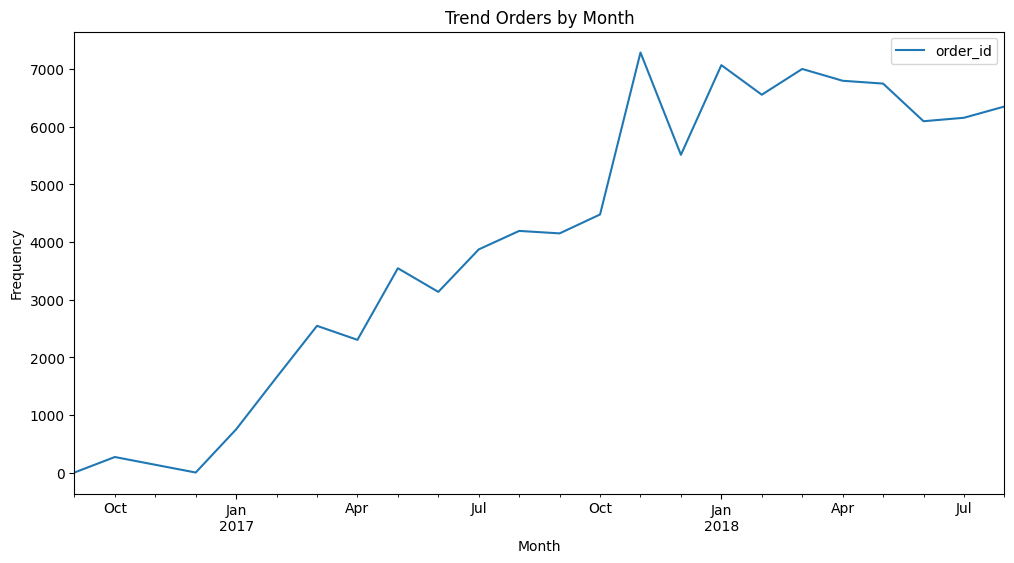

In [45]:
orders_month.plot(figsize=(12, 6))
plt.title('Trend Orders by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

### Pertanyaan 2: 
Produk apakah yang paling laris terjual? 7 kategori produk mana sajakah yang terlaris?

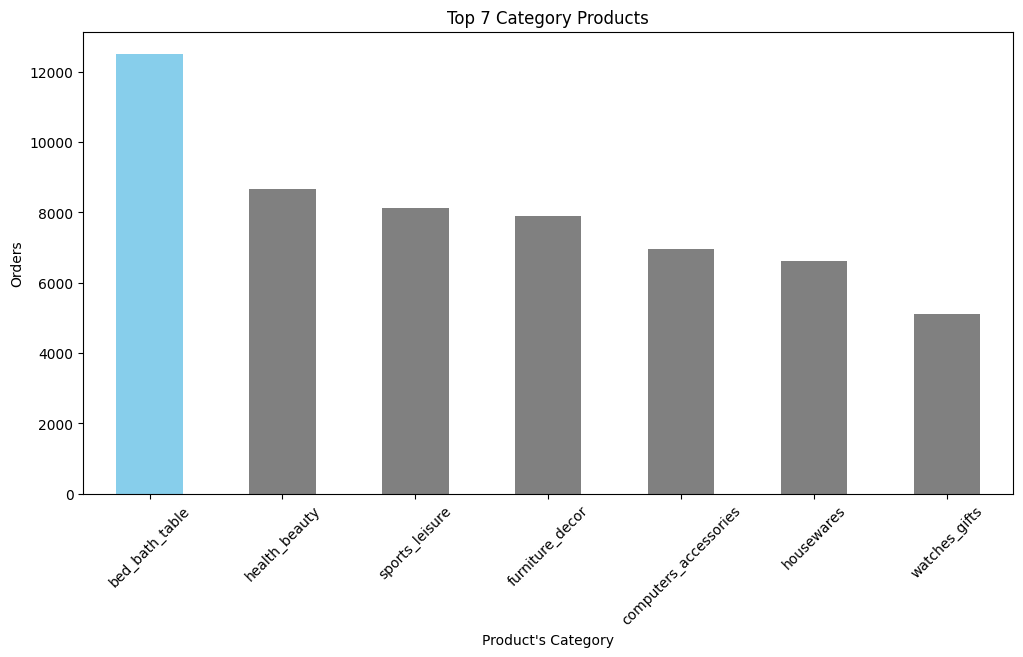

In [46]:
top7_category.plot.bar(figsize=(12,6),color=['skyblue','grey','grey','grey','grey','grey','grey'])
plt.title('Top 7 Category Products')
plt.xlabel('Product\'s Category')
plt.ylabel('Orders')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 3:
Bagaimanakah rating yang didapatkan? Apakah E-commerce Olist merupakan platform yang bagus untuk transaksi jual beli jika dilihat berdasarkan ratingnya?

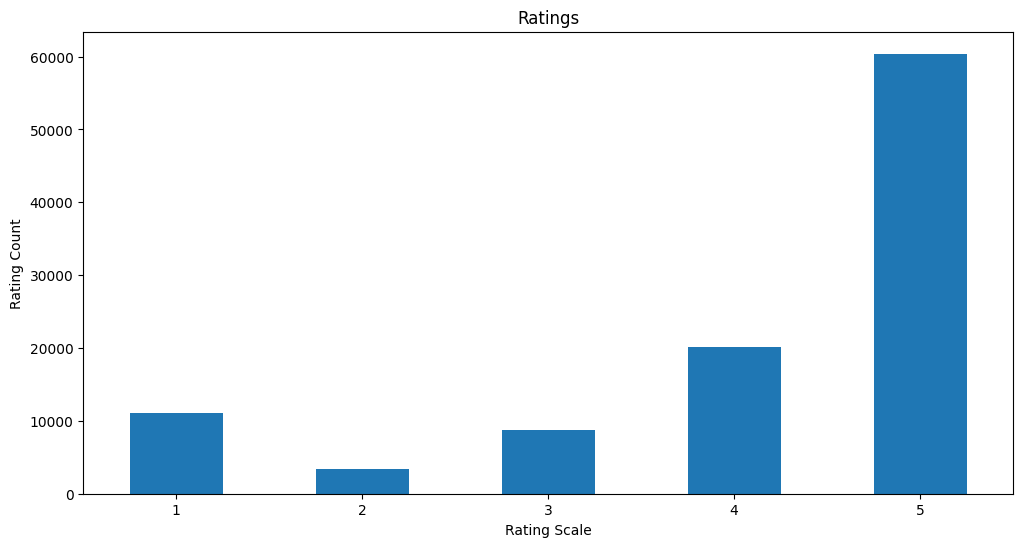

In [47]:
ratings.plot.bar(figsize=(12, 6))
plt.title('Ratings')
plt.xlabel('Rating Scale')
plt.ylabel('Rating Count')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 4:
Metode pembayaran apakah yang paling sering digunakan? Bagaimanakah persentase dari masing-masing metode pembayaran? 

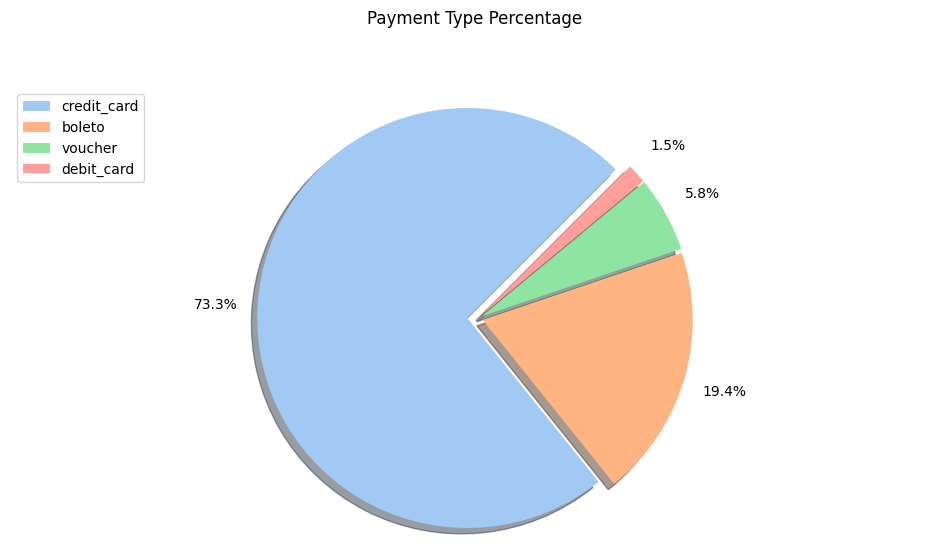

In [48]:
pastel_colors = sns.color_palette("pastel", len(type_payment))
explode_list = [0.05, 0.025, 0.025, 0.025]

fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(type_payment['count'],
       autopct='%1.1f%%',
       explode=explode_list,
       colors=pastel_colors,
       labels=None,
       shadow=True,
       pctdistance=1.2,
       startangle=45
)
ax.legend(labels=type_payment['payment_type'],loc='upper left')
ax.axis('equal')
ax.set_title('Payment Type Percentage',y=1.12)

plt.show()

### Pertanyaan 5: Sebuah usaha e-commerce tentu tidak luput dari resiko cancel order. Apakah pada Olist E-commerce terdapat produk yang mengalami cancel order? Kategori produk apa sajakah serta berapa banyak kategori produk yang dicancel tersebut? Berapakah total produk yang ordernya dicancel?

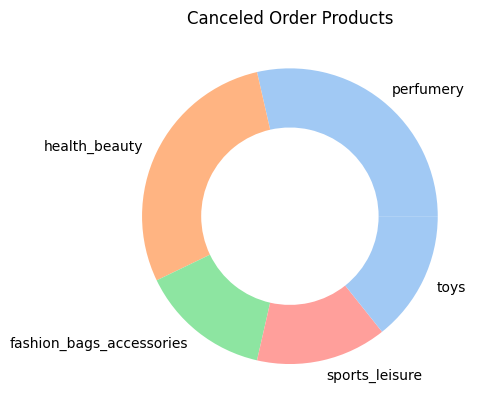

In [49]:
plt.pie(x=canceled_order['count'],
        labels=canceled_order['product_category_name_english'],
        wedgeprops = {'width': 0.4},
        colors=pastel_colors
)
plt.title('Canceled Order Products')
plt.show()

### Pertanyaan 6: 
Analisis lebih lanjut diperlukan untuk sebuah usaha e-commerce. Bagaimanakah analisis rating berdasarkan RFM Analysis? Apakah performa Olist E-commerce tergolong baik?

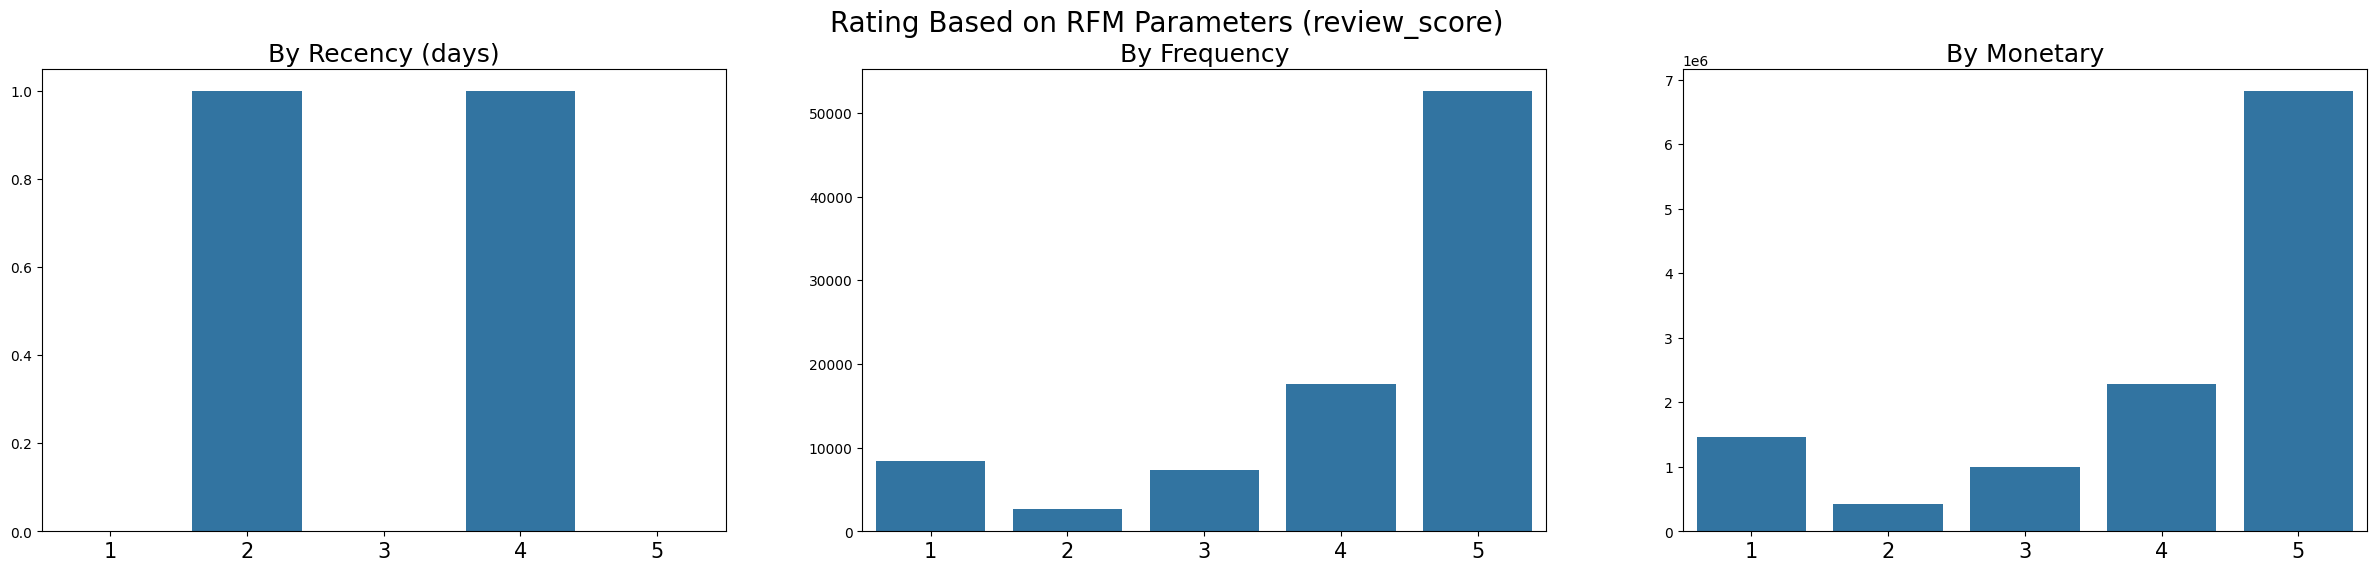

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
sns.barplot(y="recency", x="review_score", data=rfm_df.sort_values(by="recency", ascending=True).head(5), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="review_score", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="review_score", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Rating Based on RFM Parameters (review_score)", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Trend penjualan yang terjadi perbulan menunjukkan hasil yang baik. Dimana dapat dilihat pada line chart Trend Orders by Month bahwa trend penjualan cenderung mengalami kenaikan. Adapun jumlah pesanan tertinggi terjadi pada bulan November 2017, sedangkan jumlah pesanan paling sedikit terjadi pada bulan Desember 2016.
- Conclution pertanyaan 2: Berdasarkan bar chart Top 7 Category Products dapat disimpulkan bahwa produk yang paling laris terjual adalah bed_bath_table yakni sebanyak 12516 buah. Adapun disusul 6 kategori produk terlaris berikutnya yakni health_beauty (8652 buah), sports_leisure (8135 buah), furniture_decor (7886 buah), computers_accessories (6950 buah), housewares (6605 buah), serta watches_gifts (5110 buah) seperti yang dapat dilihat pada bar chartnya. 
- Conclution pertanyaan 3: Dari grafik ratings dapat disimpulkan bahwa perolehan rating Olist E-commerce baik. Dimana rating yang paling banyak diraih adalah rating 5 dan disusul rating 4. Hal ini menunjukkan bahwa performa penjualan baik sehingga memuaskan dalam transaksi jual-beli di Olist E-commerce.
- Conclution pertanyaan 4: Dari pie chart Payment Type Percentage dapat diambil kesimpulan bahwa metode pembayaran yang paling sering digunakan adalah credit card yakni sebesar 73.3% jika dibandingkan dengan metode pembayaran lainnya seperti boleto (19.4%), voucher (5.8%), dan debit card (1.5%).
- Conclution pertanyaan 5: Olist E-commerce mengalami beberapa cancel order walaupun jumlahnya tidak banyak. Adapun kategori produk yang mengalami cancel order diantaranya adalah perfumery (2 buah), health_beauty (2 buah), fashion_bags_accessories (1 buah), sports_leisure (1 buah), serta toys (1 buah). Sehingga total produk yang ordernya dicancel sebanyak 7 buah produk.
- Conclution pertanyaan 6: Berdasarkan RFM analysis yang telah dilakukan, dapat disimpulkan bahwa rating berdasarkan recency (days) berada pada rating 2 dan 4, dengan rata-rata rating berdasarkan Recency (days) sebesar 0.4. Lalu rating berdasarkan frequency tertinggi terdapat pada rating 5, dengan rata-rata rating berdasarkan Frequency sebesar 17711. Serta rating berdasarkan monetary tertinggi juga terdapat ada rating 5, dengan rata-rata rating berdasarkan Monetary sebesar $2,395,498.41. Dari hasil analisis lanjutan tersebut dapat disimpulkan bahwa berdasarkan RFM parameters, performa Olist E-commerce tergolong baik.